In [2]:
import os

In [3]:
import pandas as pd

In [4]:
survey_raw=pd.read_csv('survey_results_public.csv')

In [5]:
survey_raw

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [6]:
survey_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
schema_fname = '.\downloads\developer_survey_2020\survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [8]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [9]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [10]:
schema_raw['MainBranch']

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [11]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [12]:
len(selected_columns)

20

In [13]:
survey_df = survey_raw[selected_columns].copy()

In [14]:
schema = schema_raw[selected_columns]

In [15]:
survey_df.shape

(64461, 20)

In [16]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [17]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [18]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [19]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [20]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [21]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [22]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs < 140].index, inplace=True)

In [23]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [24]:
survey_df['Gender'].value_counts()

Man                                                            11586
Woman                                                           1123
Non-binary, genderqueer, or gender non-conforming                124
Woman;Man                                                         44
Man;Non-binary, genderqueer, or gender non-conforming             33
Woman;Non-binary, genderqueer, or gender non-conforming           33
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

In [25]:
import numpy as np

In [26]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [27]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
53353,Canada,17.0,Man,Primary/elementary school,NaN,Yes,13.0,5.0,NaN,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,Industry that I’d be working in;Financial perf...,NaN,NaN
18606,Guatemala,20.0,Man,Some college/university study without earning ...,"Information systems, information technology, o...",Yes,13.0,3.0,NaN,Bash/Shell/PowerShell;C#;Java;Python,Bash/Shell/PowerShell;Dart;Go;JavaScript,Once a year,Visit Stack Overflow;Panic;Watch help / tutori...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
39404,Nigeria,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN
37082,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
11808,India,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,7.0,6.0,Objective-C;Swift,Objective-C;Swift,Once a year,Visit Stack Overflow,Employed full-time,"Developer, mobile",NaN,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Never,Very important
63300,Bangladesh,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
30551,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,8.0,NaN,Python,Go;Python;Rust,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end",NaN,Very satisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
41726,Ethiopia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Every few months,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
19971,United States,14.0,Man,NaN,Web development or web design,Yes,7.0,7.0,NaN,HTML/CSS;JavaScript;Python,HTML/CSS;JavaScript;Python,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
42807,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,15.0,20.0,12.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, front-end;Developer, full-stack;Dev...",NaN,Neither satisfied nor dissatisfied,NaN,Sometimes: 1-2 days per month but less than we...,Somewhat important


In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
schema.Country

'Where do you live?'

In [30]:
survey_df.Country.nunique()

177

In [31]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

India             4359
United States     3344
Germany           1188
United Kingdom     979
Canada             689
France             619
Brazil             551
Pakistan           406
Netherlands        404
Nigeria            398
Name: Country, dtype: int64

In [32]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

India                 4359
United States         3344
Germany               1188
United Kingdom         979
Canada                 689
France                 619
Brazil                 551
Pakistan               406
Netherlands            404
Nigeria                398
Poland                 373
Bangladesh             361
Russian Federation     352
Italy                  338
Turkey                 327
Name: Country, dtype: int64

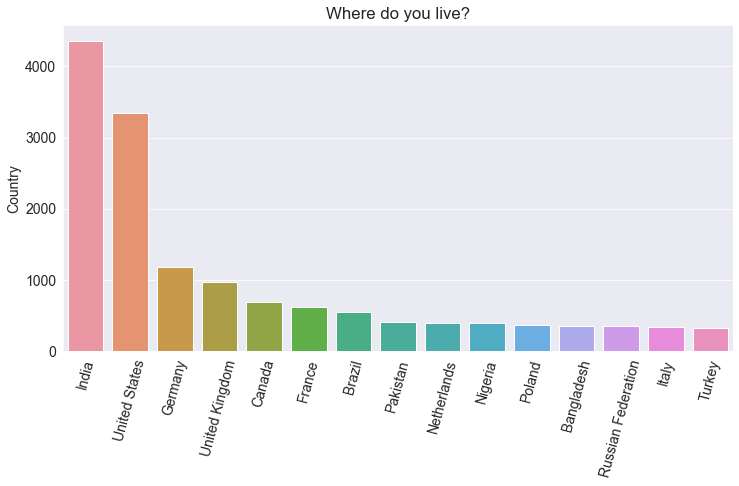

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

In [34]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

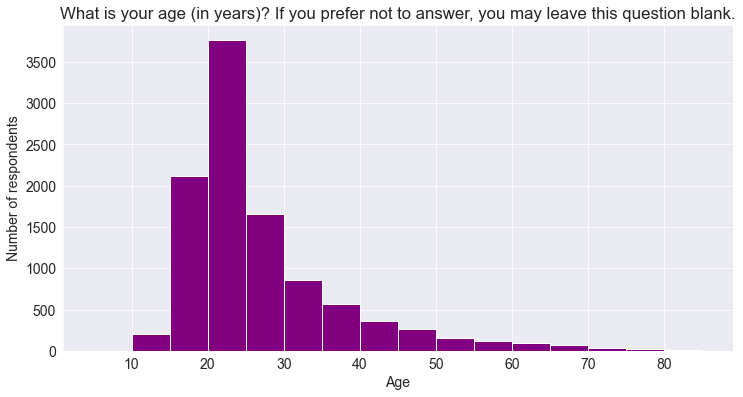

In [35]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(5,90,5), color='purple');

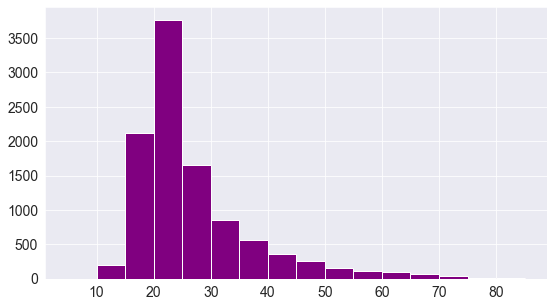

In [36]:
plt.hist(survey_df.Age, bins=np.arange(5,90,5), color='purple');

In [37]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [38]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  11586
Woman                                                 1123
Non-binary, genderqueer, or gender non-conforming      124
Name: Gender, dtype: int64

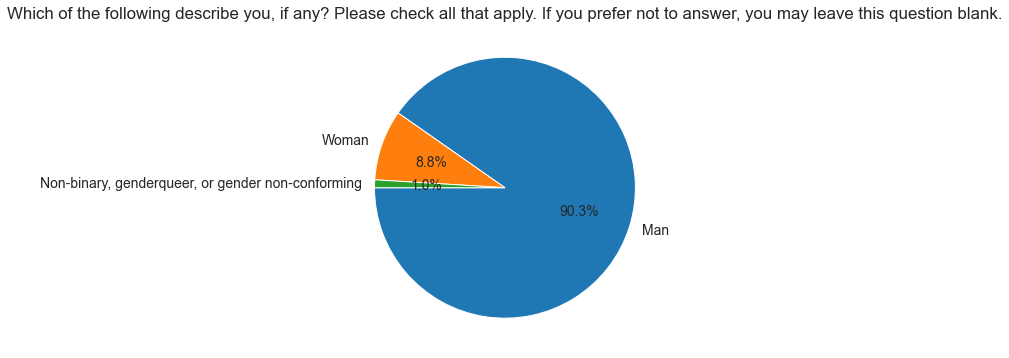

In [39]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [40]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [41]:
survey_df.EdLevel.nunique

<bound method IndexOpsMixin.nunique of 1             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2                                                      NaN
4             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
5        Secondary school (e.g. American high school, G...
6             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
                               ...                        
64456      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
64457                                                  NaN
64458                            Primary/elementary school
64459                                                  NaN
64460           Other doctoral degree (Ph.D., Ed.D., etc.)
Name: EdLevel, Length: 23457, dtype: object>

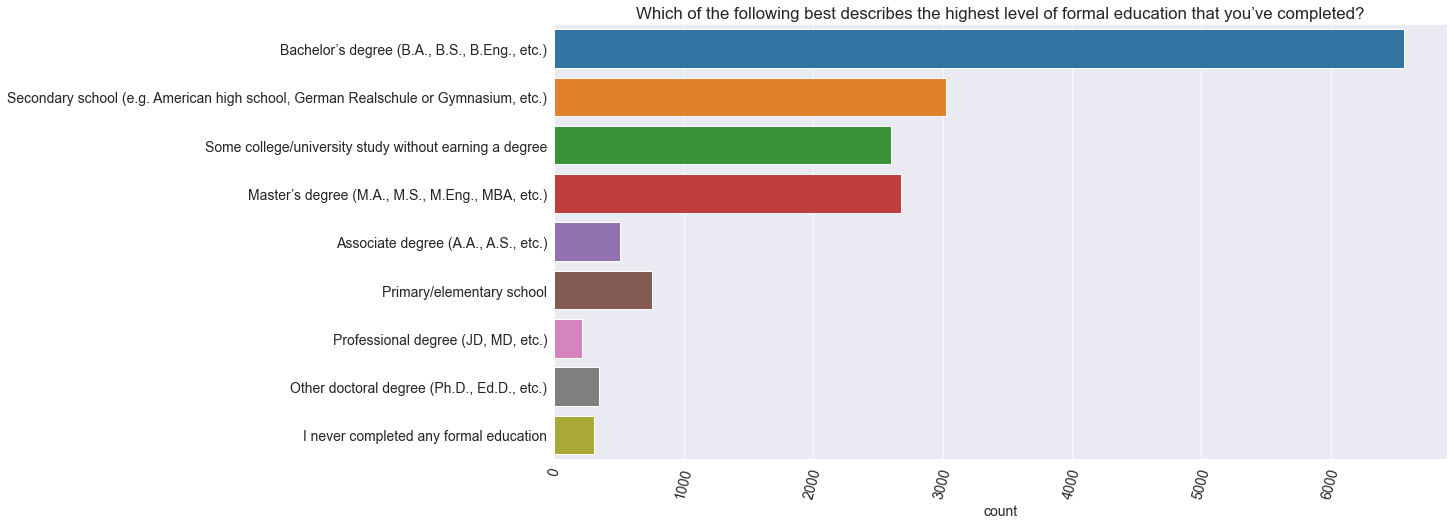

In [42]:
plt.figure(figsize=(16,8))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

In [43]:
schema.UndergradMajor

'What was your primary field of study?'

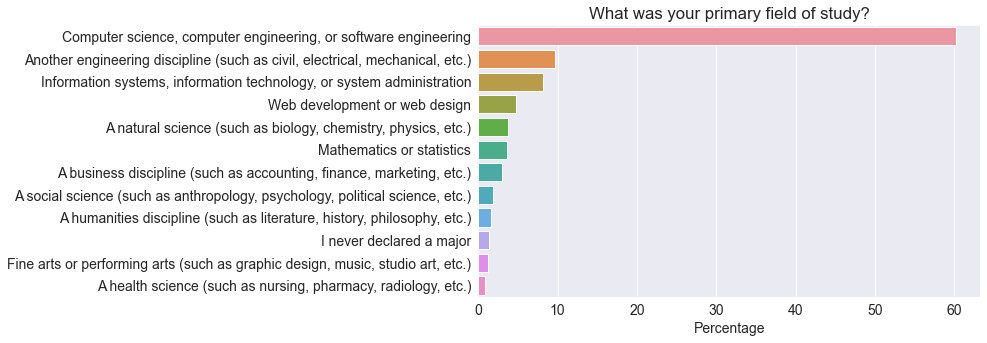

In [44]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

In [45]:
schema.Employment

'Which of the following best describes your current employment status?'

In [46]:
survey_df.Employment.value_counts()

Employed full-time                                      9563
Student                                                 7734
Not employed, but looking for work                      2324
Independent contractor, freelancer, or self-employed    1715
Employed part-time                                       913
Not employed, and not looking for work                   318
Retired                                                  241
Name: Employment, dtype: int64

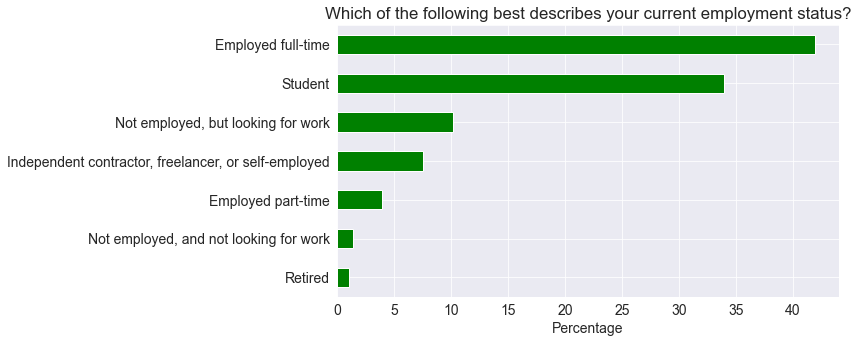

In [47]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [48]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [49]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                    739
Developer, back-end                                                                                                                                                                      531
Developer, front-end                                                                                                                                                                     329
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                           304
Developer, mobile                                                                                                                                                                        233
                                                       

In [50]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [51]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [52]:
dev_type_df

,"Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,Database administrator,Engineering manager,Product manager,...,Data scientist or machine learning specialist,"Engineer, data","Developer, desktop or enterprise applications","Developer, embedded applications or devices",Educator,Senior executive/VP,"Developer, game or graphics","Engineer, site reliability",Scientist,Marketing or sales professional
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              4244
Developer, full-stack                            4111
Developer, front-end                             3167
Developer, desktop or enterprise applications    1838
Developer, mobile                                1815
Designer                                         1322
System administrator                              992
Database administrator                            988
Academic researcher                               902
Data or business analyst                          876
Data scientist or machine learning specialist     855
Developer, embedded applications or devices       844
DevOps specialist                                 686
Engineer, data                                    679
Developer, game or graphics                       666
Educator                                          663
Developer, QA or test                             629
Product manager                                   542
Engineering manager         

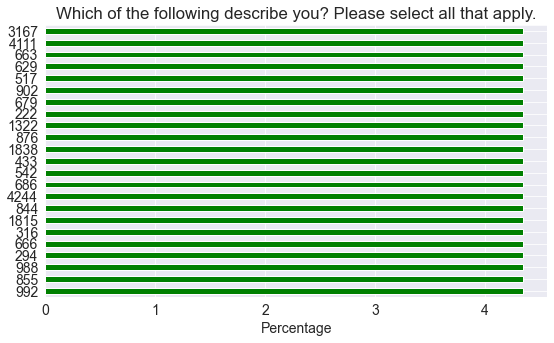

In [58]:
(dev_type_totals.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.DevType)
plt.xlabel('Percentage');

In [59]:
survey_df.LanguageWorkedWith

1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
4                                        HTML/CSS;Ruby;SQL
5                                 HTML/CSS;Java;JavaScript
6                                          C#;HTML/CSS;PHP
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 23457, dtype: object

In [60]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [61]:
languages_worked_df

,JavaScript,Swift,Objective-C,Python,HTML/CSS,Ruby,SQL,Java,C#,PHP,...,R,Julia,Assembly,Kotlin,Go,VBA,Rust,Dart,Haskell,Perl
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

HTML/CSS                 48.556934
JavaScript               46.919896
Python                   37.758452
SQL                      36.543463
Java                     34.723110
C++                      25.293089
C                        24.333888
PHP                      21.537281
C#                       21.072601
Bash/Shell/PowerShell    19.657245
TypeScript               12.985463
Assembly                  7.677879
Kotlin                    5.499424
Go                        5.273479
R                         5.098691
VBA                       4.612696
Rust                      4.429381
Swift                     4.344119
Ruby                      4.186384
Dart                      3.879439
Objective-C               2.609029
Haskell                   2.348979
Perl                      2.012193
Scala                     2.003666
Julia                     0.980518
dtype: float64

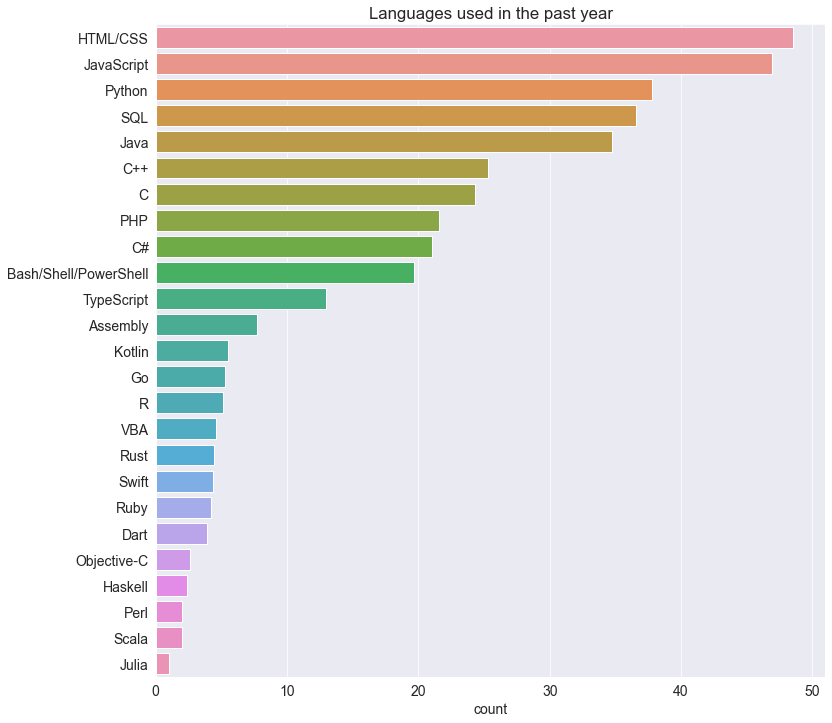

In [63]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

In [64]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   38.359552
JavaScript               33.414333
HTML/CSS                 26.533657
SQL                      23.732788
Java                     20.867971
C++                      17.888050
TypeScript               16.856375
C#                       16.566483
Go                       13.983033
Bash/Shell/PowerShell    12.938568
Kotlin                   12.763781
PHP                      12.073155
Rust                     12.004945
C                        11.399582
Swift                     8.287505
Dart                      7.127936
R                         6.940359
Ruby                      6.177261
Assembly                  5.444004
Haskell                   4.408066
Scala                     3.998806
Julia                     2.749712
Objective-C               2.647397
Perl                      2.084666
VBA                       2.024982
dtype: float64

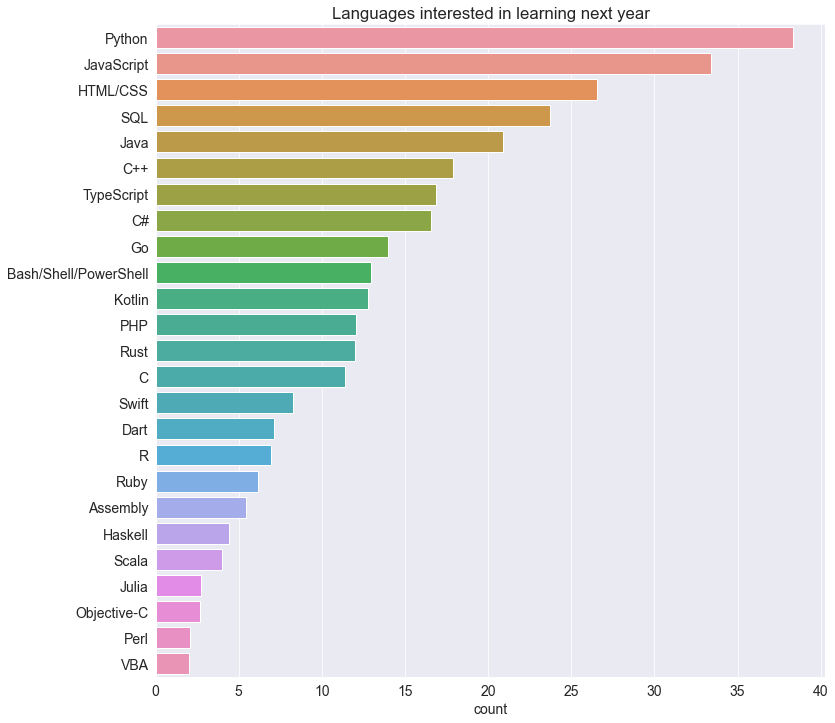

In [67]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages interested in learning next year");
plt.xlabel('count');

In [68]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   38.359552
JavaScript               33.414333
HTML/CSS                 26.533657
SQL                      23.732788
Java                     20.867971
C++                      17.888050
TypeScript               16.856375
C#                       16.566483
Go                       13.983033
Bash/Shell/PowerShell    12.938568
Kotlin                   12.763781
PHP                      12.073155
Rust                     12.004945
C                        11.399582
Swift                     8.287505
Dart                      7.127936
R                         6.940359
Ruby                      6.177261
Assembly                  5.444004
Haskell                   4.408066
Scala                     3.998806
Julia                     2.749712
Objective-C               2.647397
Perl                      2.084666
VBA                       2.024982
dtype: float64

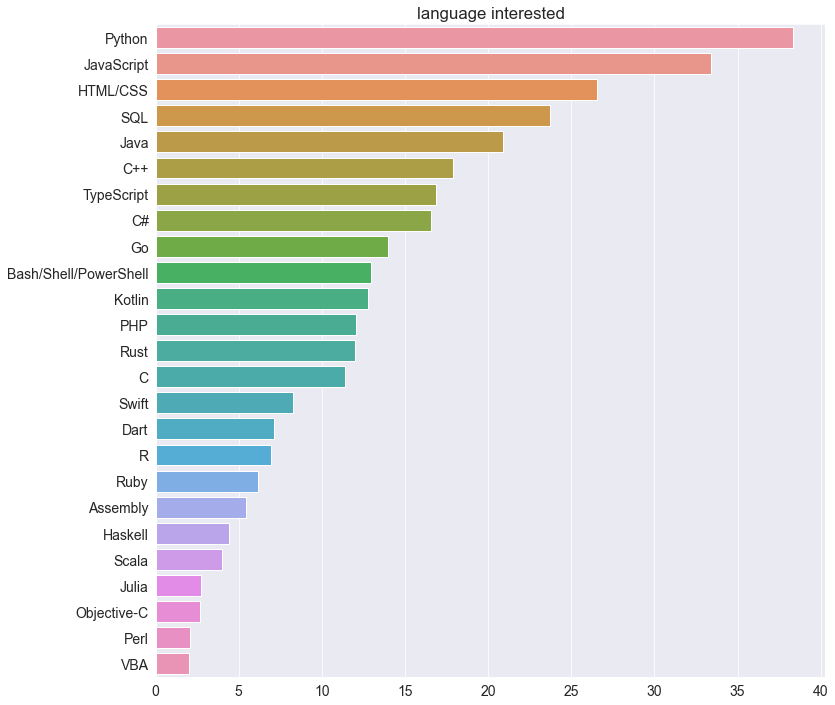

In [72]:
plt.figure(figsize=(12,12))
plt.title('language interested')
sns.barplot(x=languages_interested_percentages,y=languages_interested_percentages.index);